# BANKING CHURN

**A dataset which contain some customers who are withdrawing their account from the bank due to some loss and other issues with the help this data we try to analyse and maintain accuracy.**

 

# Importing required modules

In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Importing Data

In [6]:
os.chdir(r'C:\Users\Lenovo\Desktop\DataScience\PYTHON\DATAFILES')

In [10]:
data = pd.read_csv('bankingchurn.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# EDA

In [11]:
print('Total number of bank customers :',len(data))

Total number of bank customers : 10000


In [137]:
print('Exited : ',data.Exited[data['Exited']==1].count()/len(data)*100,'%')
print('Retained : ',data.Exited[data['Exited']==0].count()/len(data)*100,'%')

Exited :  20.369999999999997 %
Retained :  79.63 %


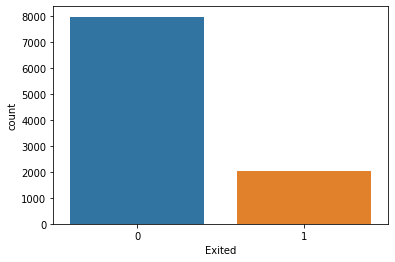

In [12]:
sns.countplot(x='Exited',data=data) 

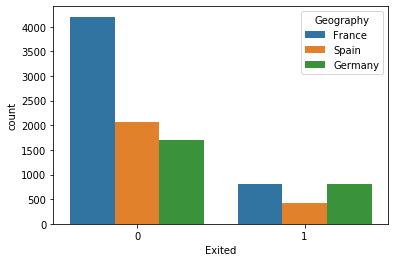

In [14]:
sns.countplot(x='Exited',hue='Geography',data=data)
#most of the bank customers are from France.
    #exiting customers from France and Germany are equivalent

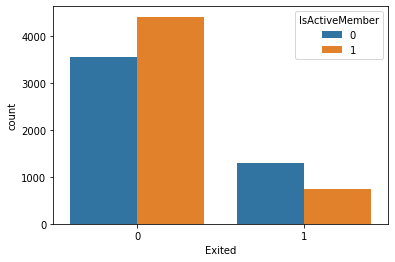

In [54]:
sns.countplot(x='Exited',hue='IsActiveMember',data=data)
#It is obvious that inactive bank acc holders may exit the bank

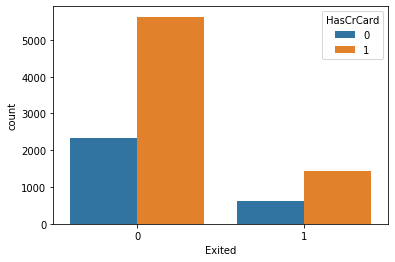

In [17]:
sns.countplot(x='Exited',hue='HasCrCard',data=data)
# more customers churned were having credit card

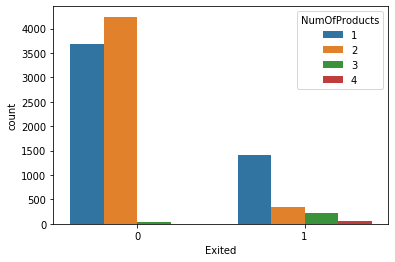

In [28]:
sns.countplot(x='Exited',hue='NumOfProducts',data=data)

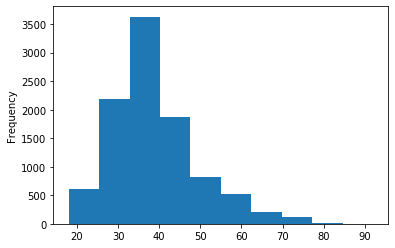

In [18]:
data['Age'].plot.hist()
#max age group is between 35 to 40

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

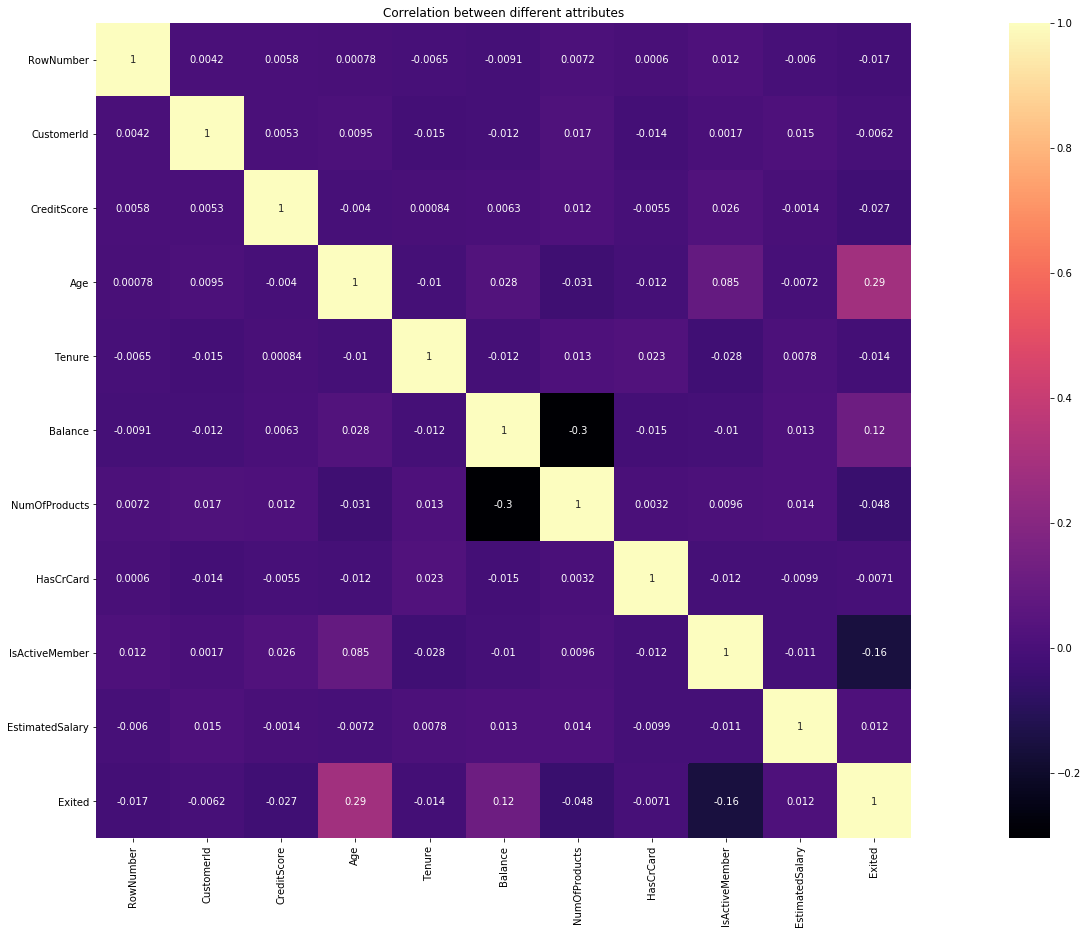

In [35]:
plt.figure(figsize=(35,15))
sns.heatmap(data.corr(), vmax=1, square=True,annot=True,cmap='magma')
plt.title('Correlation between different attributes')
plt.show()

# Data Wrangling

In [61]:
data.drop(['RowNumber', 'CustomerId','Surname'], axis = 1,inplace=True)

In [62]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [68]:
Region = pd.get_dummies(data['Geography'],drop_first=True)
Region
#when 1 it is Spain, when 0 it is Germany, when  both are 0 then France

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [67]:
Sex = pd.get_dummies(data['Gender'],drop_first=True)
Sex
#when it is zero then Female if 1 then it is Male

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [69]:
data = pd.concat([data,Region,Sex],axis=1)

In [70]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [71]:
data.drop(['Geography','Gender'], axis = 1,inplace=True)

# Final Dataset

In [72]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Model Building

**LOGISTIC REGRESSION**

In [73]:
x = data.drop('Exited',axis=1)
y= data['Exited']

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [75]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [76]:
prediction = model.predict(x_test)

In [86]:
print("classification report for Logistic Regression")

print("...."*13)

print(classification_report(y_test, prediction))

classification report for Logistic Regression
....................................................
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1585
           1       0.35      0.04      0.07       415

    accuracy                           0.79      2000
   macro avg       0.58      0.51      0.48      2000
weighted avg       0.70      0.79      0.71      2000



In [80]:
print(confusion_matrix(y_test, prediction))

[[1554   31]
 [ 398   17]]


**SUPPORT VECTOR MACHINE**

In [110]:
from sklearn.svm import SVC
svc= SVC(gamma=0.1, C=3)
svc.fit(x_train, y_train)

SVC(C=3, gamma=0.1)

In [111]:
predicted = svc.predict(x_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
print('Support vector machine Agorithm is predicting accuray at {0:.2g}%'.format(svc.score(x_test, y_test)*100))

Support vector machine Agorithm is predicting accuray at 79%


In [113]:
print("classification_report for SVC")

print("...."*14)

print(classification_report(y_test, predicted))

classification_report for SVC
........................................................
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1585
           1       0.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**REMARKABLE POINTS**
1. Majority of the data is of customers from France.However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

2. The proportion of female customers churning is also greater than that of male customers

3. Most of the customers that churned are those with credit cards.majority of the customers have credit cards could prove this to be just a coincidence.

4.  The inactive members have a greater churn (obvious). **overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn**

# RANDOM FOREST CLASSIFIER

Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. Random forest has nearly the same hyperparameters as a decision tree or a bagging classifier.

In [145]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [146]:
X = data.drop('Exited',axis=1)
Y= data['Exited']

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [148]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [149]:
rfmodel=RandomForestClassifier(n_estimators=100)

In [151]:
rfmodel.fit(X_train,Y_train)

RandomForestClassifier()

In [152]:
y_pred=rfmodel.predict(X_test)

In [156]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred) * 100)

Accuracy: 85.56666666666666


# THE END